In [1]:
# import pandas library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# read the file and assign it to variable "df"

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
print("Done")

Done


In [3]:
#inspect train file
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
#check columns
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#modify columns if any have spaces
train.columns =[i.replace(' ', '_').lower() for i in train.columns]

In [8]:
#check for the dataset information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [9]:
#calculate summary statistics using a function
def ames_eda(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    
    return pd.DataFrame(eda_df)
ames_eda(train)

C:\Users\azamm\AppData\Local\Temp/ipykernel_18124/1660628254.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  eda_df['mean'] = df.mean()
C:\Users\azamm\AppData\Local\Temp/ipykernel_18124/1660628254.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  eda_df['median'] = df.median()
C:\Users\azamm\AppData\Local\Temp/ipykernel_18124/1660628254.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  eda_df['min'] = df.min()
C:\Users\azamm\AppData\Local\Temp/ipykernel_18124/1660628254.py:11:

,null_sum,null_pct,dtypes,count,mean,median,min,max
1stflrsf,0,0.000000,int64,1460,1162.626712,1087.0,334,4692
2ndflrsf,0,0.000000,int64,1460,346.992466,0.0,0,2065
3ssnporch,0,0.000000,int64,1460,3.409589,0.0,0,508
alley,1369,0.937671,object,91,NaN,NaN,NaN,NaN
bedroomabvgr,0,0.000000,int64,1460,2.866438,3.0,0,8
...,...,...,...,...,...,...,...,...
utilities,0,0.000000,object,1460,NaN,NaN,AllPub,NoSeWa
wooddecksf,0,0.000000,int64,1460,94.244521,0.0,0,857
yearbuilt,0,0.000000,int64,1460,1971.267808,1973.0,1872,2010
yearremodadd,0,0.000000,int64,1460,1984.865753,1994.0,1950,2010


In [10]:
#check for the dataset data types
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [12]:
#check for specific datatypes
train.select_dtypes(include=['object']).columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

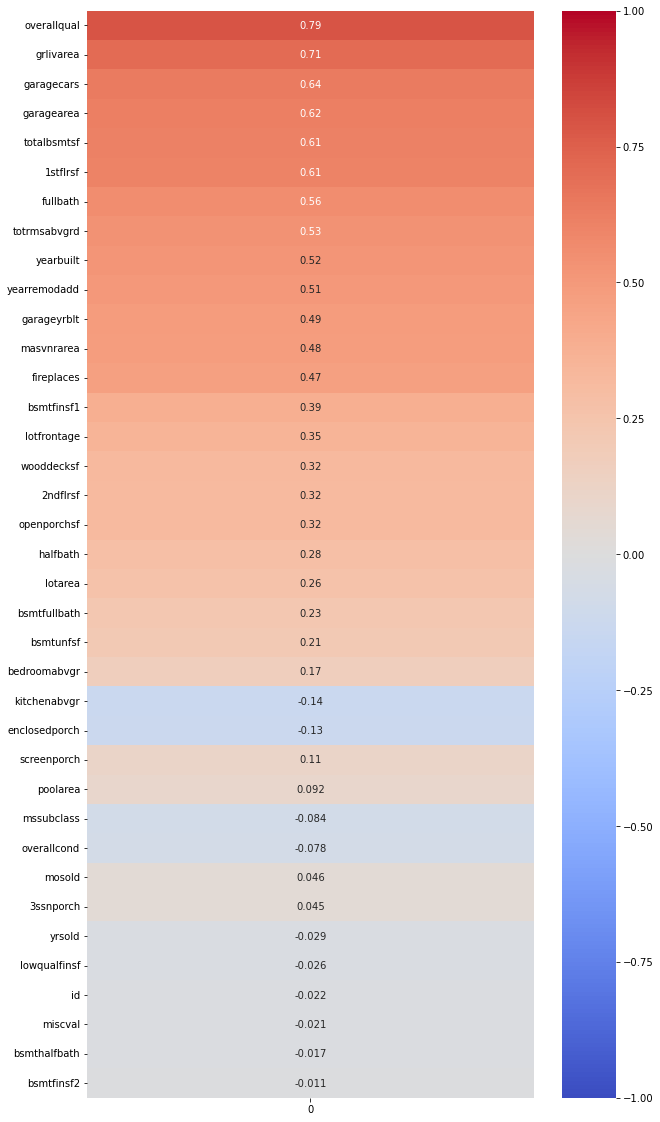

In [14]:
# pairwise correlation between all of the numeric variables in the data frame and our target, 'sale price'
# Compute pairwise correlations between all columns in the 'train' DataFrame and the 'saleprice' column
correlations = train.corrwith(train['saleprice']).iloc[:-1].to_frame()

# Compute the absolute values of the correlation coefficients and add them as a new column to the DataFrame
correlations['abs'] = correlations[0].abs()

# Sort the correlations by absolute value (in descending order)
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]

# Create a heatmap of the sorted correlations using seaborn
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);


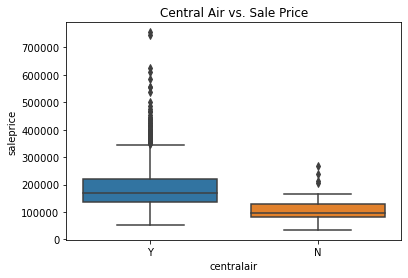

In [17]:
#generate boxplots to compare the catergorical/ordinal values with 'sale price'
sns.boxplot(x=train['centralair'],
        y=train['saleprice']).set_title('Central Air vs. Sale Price');

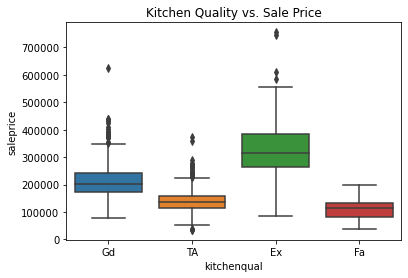

In [19]:
sns.boxplot(x=train['kitchenqual'], 
            y=train['saleprice']).set_title('Kitchen Quality vs. Sale Price');

In [20]:
train['garagequal'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: garagequal, dtype: int64

In [21]:
#def garage_qual_cleaner(cell):
    if cell == 'Ex':
        return 5
    elif cell == 'Gd':
        return 4
    elif cell == 'TA':
        return 3
    elif cell == 'Fa':
        return 2
    elif cell == 'Po':
        return 1
    else:
        return 0
 #use a dictionary for simple and short code  
#conveerting the string to numeric values
def garage_qual_cleaner(cell):
    mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
    return mapping.get(cell, 0)

In [33]:
#since there are 42 object columns we can invest in defining one master function that can clean and organize the data
def clean_data(df):
    # map numeric values onto all the quality columns using a quality dictionary
    qual_dict = {'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}
    # create a list of ordinal column names 
    ordinal_col_names = [col for col in df.columns if (col[-4:] in ['qual', 'cond']) and col[:3] != 'ove'] # last section ignores "overall quality columns which will be addressed below
    # creating a new feature called age
    #df['age'] = df.apply(lambda row: row['YrSold'] - max(row['YearBuilt'], row['YearRemodAdd']), axis=1)
    df['age'] = df.apply(lambda row: row['yrsold'] - max(row['yearbuilt'], row['yearremodadd']), axis=1)

    # dummify the date sold column 
    df['date_sold'] = df.apply(lambda row: str(row['mosold'])+ '-' + str(row['yrsold']), axis=1)
    df.loc[:,df.dtypes!= 'object'] = df.loc[:, df.dtypes != 'object'].apply(lambda col: col.fillna(col.mean()))
    
    # transforming columns 
    df[ordinal_col_names] = df[ordinal_col_names].applymap(lambda cell: 2 if pd.isnull(cell) else qual_dict[cell])
    
    return df
# applying the function to train data
train = clean_data(train)  # 'MoSold', 'YrSold' 'YearBuilt', 'YearRemodAdd

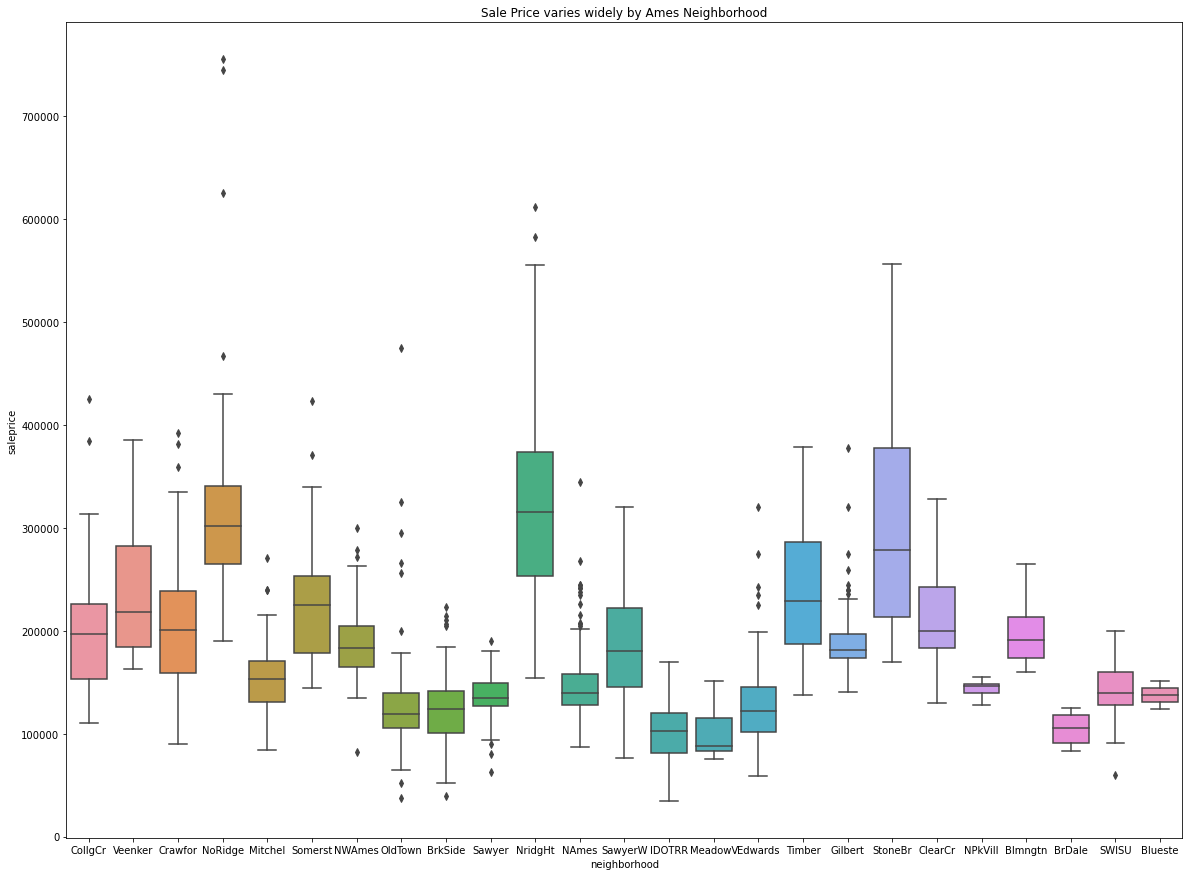

In [39]:
#some neighbours have higher sale prices than others
plt.figure(figsize=(20,15)) # adjust the fig size to see everything
sns.boxplot(x=train['neighborhood'], y=train['saleprice']).set_title('Sale Price varies widely by Ames Neighborhood');

In [40]:
#dummfying neighbour in the train dataset
pd.get_dummies(train, columns=['neighborhood'], drop_first=True)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0


In [42]:
train.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

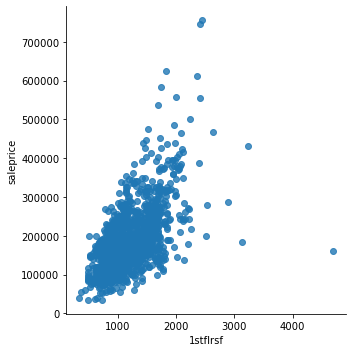

In [43]:
#check for outliers
sns.lmplot(x='1stflrsf', y='saleprice', data=train, fit_reg=False)

In [45]:
#inspect and handle outliers
train.loc[train['1stflrsf']>3600]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,age,date_sold
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,NaN,NaN,0,1,2008,New,Partial,160000,0,1-2008


In [46]:
#drop the 
train.drop([1298], inplace=True)

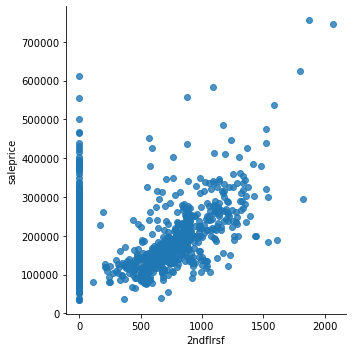

In [48]:
#check for outliers
sns.lmplot(x='2ndflrsf', y='saleprice', data=train, fit_reg=False)